In [2]:
#Murat Şahin IBB günlük araç adedi analizi ve makine öğrenmesi çalışmasıdır.

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dailytrafficflowdataatdesignatedpointsistanbul/2022-yl-gunluk-arac-saym.csv
/kaggle/input/dailytrafficflowdataatdesignatedpointsistanbul/2016-20-yl-gunluk-arac-saym.csv
/kaggle/input/dailytrafficflowdataatdesignatedpointsistanbul/2021-yl-gunluk-arac-saym.csv
/kaggle/input/dailytrafficflowdataatdesignatedpointsistanbul/2023-yl-gunluk-arac-saym.csv


In [1]:
import pandas as pd

# Dosya yolunu belirtiyoruz
file_path_2016_2020 = '/kaggle/input/dailytrafficflowdataatdesignatedpointsistanbul/2016-20-yl-gunluk-arac-saym.csv'

# Farklı bir encoding (örneğin ISO-8859-9) kullanarak CSV dosyasını okuyoruz
df_2016_2020 = pd.read_csv(file_path_2016_2020, encoding='ISO-8859-9', delimiter=';')

# Sütun isimlerini belirleyelim
df_2016_2020.columns = ['Tarih', 'Sensor Adi', 'X Koordinati', 'Y Koordinati', 'Arac Sayisi']

# Sayısal sütunları tespit edelim
numeric_columns_2016_2020 = df_2016_2020.select_dtypes(include=['float64', 'int64']).columns

# Sadece sayısal sütunlarda doldurma işlemi yapılır
df_2016_2020[numeric_columns_2016_2020] = df_2016_2020[numeric_columns_2016_2020].fillna(df_2016_2020[numeric_columns_2016_2020].mean())

# Tarih sütununu datetime formatına çevirelim
df_2016_2020['Tarih'] = pd.to_datetime(df_2016_2020['Tarih'], errors='coerce')

# Temizlenen veriyi yazdırma
print(df_2016_2020.head())


       Tarih                                         Sensor Adi X Koordinati  \

0 2016-01-01                                     10. Yıl Cad. 2  28,92097089   

1 2016-01-01  15 Temmuz Şehitler Köprüsü Çıkışı- Metrobüs Gi...  29,01859443   

2 2016-01-01         15 Temmuz Şehitler Köprüsü Yıldız Katılımı  29,01843233   

3 2016-01-01                                          4. Levent  29,01085152   

4 2016-01-01                                           4.Levent  29,01051159   



  Y Koordinati  Arac Sayisi  

0   40,9950792        11328  

1  41,05800076        40291  

2  41,05770224        49912  

3  41,08173288        31906  

4   41,0813878        22043  


In [2]:
# Dosya yolunu belirtiyoruz
file_path_2021 = '/kaggle/input/dailytrafficflowdataatdesignatedpointsistanbul/2021-yl-gunluk-arac-saym.csv'

# Farklı bir encoding (örneğin ISO-8859-9) kullanarak CSV dosyasını okuyoruz
df_2021 = pd.read_csv(file_path_2021, encoding='ISO-8859-9', delimiter=';', usecols=[0, 1, 2, 3, 4], on_bad_lines='skip')

# Sütun isimlerini belirleyelim
df_2021.columns = ['Tarih', 'Sensor Adi', 'X Koordinati', 'Y Koordinati', 'Arac Sayisi']

# Virgülleri noktayla değiştirelim
df_2021['X Koordinati'] = df_2021['X Koordinati'].str.replace(',', '.')
df_2021['Y Koordinati'] = df_2021['Y Koordinati'].str.replace(',', '.')

# Hatalı olan (sayısala çevrilemeyen) satırları kontrol edip silelim
df_2021 = df_2021[pd.to_numeric(df_2021['X Koordinati'], errors='coerce').notnull()]
df_2021 = df_2021[pd.to_numeric(df_2021['Y Koordinati'], errors='coerce').notnull()]

# X ve Y koordinatlarını sayısal değerlere çevirelim
df_2021['X Koordinati'] = df_2021['X Koordinati'].astype(float)
df_2021['Y Koordinati'] = df_2021['Y Koordinati'].astype(float)

# Eksik verileri kontrol edelim ve gerekirse dolduralım
numeric_columns_2021 = df_2021.select_dtypes(include=['float64', 'int64']).columns
df_2021[numeric_columns_2021] = df_2021[numeric_columns_2021].fillna(df_2021[numeric_columns_2021].mean())

# Tarih sütununu datetime formatına çevirelim
df_2021['Tarih'] = pd.to_datetime(df_2021['Tarih'], errors='coerce')

# Temizlenen veriyi yazdırma
print(df_2021.head())


       Tarih            Sensor Adi  X Koordinati  Y Koordinati  Arac Sayisi

0 2021-01-01          TEM Arıcılar     28.981994     41.100210      37325.0

2 2021-01-01         D100 Gülsuyu      29.152523     40.924870      19380.0

3 2021-01-01  Kavacık Hisar Evleri     29.094684     41.082827      31554.0

4 2021-01-01      Ümraniye Kavşağı     29.121095     41.028943      24416.0

5 2021-01-01            TEM Kartal     29.185932     40.989852      24292.0


In [3]:
# 2022 yılı veri seti için dosya yolunu belirtelim
file_path_2022 = '/kaggle/input/dailytrafficflowdataatdesignatedpointsistanbul/2022-yl-gunluk-arac-saym.csv'

# CSV dosyasını delimiter ile okuyoruz, hatalı satırları atlamak için on_bad_lines='skip' kullanıyoruz
df_2022 = pd.read_csv(file_path_2022, encoding='ISO-8859-9', delimiter=';', on_bad_lines='skip')

# Sütun isimlerini belirleyelim
df_2022.columns = ['Tarih', 'Sensor Adi', 'X Koordinati', 'Y Koordinati', 'Arac Sayisi']

# "Sensor Adi" sütunundaki bozuk karakterleri düzelten fonksiyon
def fix_sensor_name(sensor_name):
    replacements = {
        'ÃamlÄ±ca GiÅeler': 'Çamlıca Gişeler',
        'AtakÃ¶y': 'Ataköy',
        'GÃ¶ktÃ¼rk KavÅaÄÄ±': 'Göktürk Kavşağı',
        'TepebaÅÄ±': 'Tepebaşı'
        # Diğer bozuk karakterler de burada eklenebilir
    }
    
    # Her bozuk karakteri doğru olan ile değiştirelim
    return replacements.get(sensor_name, sensor_name)

# "Sensor Adi" sütunundaki bozuk verileri düzeltiyoruz
df_2022['Sensor Adi'] = df_2022['Sensor Adi'].apply(fix_sensor_name)

# Eksik verileri kontrol edelim ve gerekirse dolduralım
numeric_columns_2022 = df_2022.select_dtypes(include=['float64', 'int64']).columns

# Sadece sayısal sütunlarda doldurma işlemi yapılır
df_2022[numeric_columns_2022] = df_2022[numeric_columns_2022].fillna(df_2022[numeric_columns_2022].mean())

# Tarih sütununu datetime formatına çevirelim
df_2022['Tarih'] = pd.to_datetime(df_2022['Tarih'], errors='coerce')

# Sonucu kontrol edelim
df_2022.head()


,Tarih,Sensor Adi,X Koordinati,Y Koordinati,Arac Sayisi
0,2022-01-01,Çamlıca Gişeler,29.180890,40.990655,136252
1,2022-01-01,Ataköy,28.865933,40.976046,63770
2,2022-01-01,Göktürk Kavşağı,28.878916,41.176403,41420
3,2022-01-01,Tepebaşı,28.975025,41.035470,58457
4,2022-01-01,O-3 Esenler,28.882698,41.046021,142901


In [4]:
import pandas as pd

# Dosya yolunu belirtiyoruz
file_path_2023 = '/kaggle/input/dailytrafficflowdataatdesignatedpointsistanbul/2023-yl-gunluk-arac-saym.csv'

# UTF-8 BOM sorununu çözmek ve virgülle ayrılmış verileri doğru şekilde okumak için delimiter ve encoding'i ayarlayalım
df_2023 = pd.read_csv(file_path_2023, encoding='utf-8-sig', delimiter=',')

# Sütunları kontrol edelim
print("Sütunlar:", df_2023.columns)

# İlk birkaç satırı kontrol edelim
print(df_2023.head())

# Sütun isimlerini düzenleyelim (gerekiyorsa bu aşamada el ile sütun adlarını güncelleyebiliriz)
df_2023.columns = ['Tarih', 'Sensor Adi', 'X Koordinati', 'Y Koordinati', 'Arac Sayisi']

# Virgülleri noktayla değiştirelim
df_2023['X Koordinati'] = df_2023['X Koordinati'].str.replace(',', '.')
df_2023['Y Koordinati'] = df_2023['Y Koordinati'].str.replace(',', '.')

# Hatalı olan (sayısala çevrilemeyen) satırları kontrol edip silelim
df_2023 = df_2023[pd.to_numeric(df_2023['X Koordinati'], errors='coerce').notnull()]
df_2023 = df_2023[pd.to_numeric(df_2023['Y Koordinati'], errors='coerce').notnull()]

# X ve Y koordinatlarını sayısal değerlere çevirelim
df_2023['X Koordinati'] = df_2023['X Koordinati'].astype(float)
df_2023['Y Koordinati'] = df_2023['Y Koordinati'].astype(float)

# Eksik verileri kontrol edelim ve gerekirse dolduralım
numeric_columns_2023 = df_2023.select_dtypes(include=['float64', 'int64']).columns
df_2023[numeric_columns_2023] = df_2023[numeric_columns_2023].fillna(df_2023[numeric_columns_2023].mean())

# Tarih sütununu datetime formatına çevirelim
df_2023['Tarih'] = pd.to_datetime(df_2023['Tarih'], errors='coerce')

# Temizlenen veriyi yazdırma
print(df_2023.head())


Sütunlar: Index(['Tarih', 'Sensor Adi', 'X Koordinatı', 'Y Koordinatı', 'AracSayim'], dtype='object')

        Tarih                     Sensor Adi X Koordinatı Y Koordinatı  \

0  2023-01-01                TEM Karanfilköy    29,028617    41,092425   

1  2023-01-01           D100 Yıldız Katılımı  29,01150415  41,05453412   

2  2023-01-01                      Atışalanı      28,8551      41,0551   

3  2023-01-01                     Bayrampaşa   28,9083993  41,04031561   

4  2023-01-01  TEM D100 Okmeydanı Bağl. Yolu  28,95766695  41,06065904   



   AracSayim  

0      93583  

1      36151  

2      57969  

3     173431  

4      84382  

       Tarih                     Sensor Adi  X Koordinati  Y Koordinati  \

0 2023-01-01                TEM Karanfilköy     29.028617     41.092425   

1 2023-01-01           D100 Yıldız Katılımı     29.011504     41.054534   

2 2023-01-01                      Atışalanı     28.855100     41.055100   

3 2023-01-01                     Bayrampaşa  

In [5]:
# Tüm veri setlerini aynı sütun isimleriyle hazırladığınızdan emin olun
df_2016_2020.columns = ['Tarih', 'Sensor Adi', 'X Koordinati', 'Y Koordinati', 'Arac Sayisi']
df_2021.columns = ['Tarih', 'Sensor Adi', 'X Koordinati', 'Y Koordinati', 'Arac Sayisi']
df_2022.columns = ['Tarih', 'Sensor Adi', 'X Koordinati', 'Y Koordinati', 'Arac Sayisi']
df_2023.columns = ['Tarih', 'Sensor Adi', 'X Koordinati', 'Y Koordinati', 'Arac Sayisi']

# Tüm veri setlerini birleştiriyoruz
df_union = pd.concat([df_2016_2020, df_2021, df_2022, df_2023], ignore_index=True)

# Birleşik veri setinin ilk birkaç satırını kontrol edelim
print(df_union.head())

# Birleşik veri setini CSV olarak kaydetmek isterseniz
df_union.to_csv("union_arac_sayisi.csv", index=False)


       Tarih                                         Sensor Adi X Koordinati  \

0 2016-01-01                                     10. Yıl Cad. 2  28,92097089   

1 2016-01-01  15 Temmuz Şehitler Köprüsü Çıkışı- Metrobüs Gi...  29,01859443   

2 2016-01-01         15 Temmuz Şehitler Köprüsü Yıldız Katılımı  29,01843233   

3 2016-01-01                                          4. Levent  29,01085152   

4 2016-01-01                                           4.Levent  29,01051159   



  Y Koordinati  Arac Sayisi  

0   40,9950792      11328.0  

1  41,05800076      40291.0  

2  41,05770224      49912.0  

3  41,08173288      31906.0  

4   41,0813878      22043.0  


In [6]:
# Her bir veri setinin satır sayısını kontrol edelim
print("2016-2020 satır sayısı:", len(df_2016_2020))
print("2021 satır sayısı:", len(df_2021))
print("2022 satır sayısı:", len(df_2022))
print("2023 satır sayısı:", len(df_2023))

# Birleşmiş veri setinin satır sayısını kontrol edelim
print("Birleşmiş veri seti satır sayısı:", len(df_union))

# Satır sayısının toplamı doğru olmalı
expected_row_count = len(df_2016_2020) + len(df_2021) + len(df_2022) + len(df_2023)
print("Beklenen toplam satır sayısı:", expected_row_count)
print("Birleşmiş veri seti satır sayısı doğru mu?:", len(df_union) == expected_row_count)


2016-2020 satır sayısı: 614948

2021 satır sayısı: 95066

2022 satır sayısı: 96559

2023 satır sayısı: 89449

Birleşmiş veri seti satır sayısı: 896022

Beklenen toplam satır sayısı: 896022

Birleşmiş veri seti satır sayısı doğru mu?: True


In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split

# Veriyi ölçekleme (LSTM için genellikle MinMaxScaler kullanılır)
scaler = MinMaxScaler()

# DataFrame'in sadece sayısal değerlerini alıp ölçekleyelim
scaled_data = scaler.fit_transform(df_union['Arac Sayisi'].values.reshape(-1, 1))  # Sadece 'Arac Sayisi' üzerinden çalışıyoruz

# Zaman serisi generator ile veri setini LSTM için hazırlayalım
sequence_length = 12  # 12 ay geriye giderek tahmin yapacağız
generator = TimeseriesGenerator(scaled_data, scaled_data, length=sequence_length, batch_size=1)

# Veriyi train ve test seti olarak bölelim
X, y = [], []
for i in range(len(generator)):
    X_sample, y_sample = generator[i]
    X.append(X_sample)
    y.append(y_sample)

X = np.array(X).reshape(-1, sequence_length, 1)
y = np.array(y)

# Veriyi %80 eğitim, %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# LSTM modelini tanımlama
def create_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    
    # LSTM katmanı
    model.add(LSTM(units=units, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(Dropout(dropout_rate))
    
    # İkinci LSTM katmanı
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    
    # Çıkış katmanı
    model.add(Dense(1))  # Tek bir çıktımız olacak (arac sayisi tahmini)

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Modeli oluşturma
model = create_lstm_model(units=100, dropout_rate=0.2)

# Erken durdurma (overfitting'i engellemek için)
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(**kwargs)


Epoch 1/20

22401/22401 ━━━━━━━━━━━━━━━━━━━━ 252s 11ms/step - loss: 0.0103 - val_loss: 0.0097

Epoch 2/20

22401/22401 ━━━━━━━━━━━━━━━━━━━━ 248s 11ms/step - loss: 0.0097 - val_loss: 0.0092

Epoch 3/20

22401/22401 ━━━━━━━━━━━━━━━━━━━━ 242s 11ms/step - loss: 0.0091 - val_loss: 0.0083

Epoch 4/20

22401/22401 ━━━━━━━━━━━━━━━━━━━━ 248s 11ms/step - loss: 0.0083 - val_loss: 0.0074

Epoch 5/20

22401/22401 ━━━━━━━━━━━━━━━━━━━━ 242s 11ms/step - loss: 0.0075 - val_loss: 0.0069

Epoch 6/20

22401/22401 ━━━━━━━━━━━━━━━━━━━━ 251s 11ms/step - loss: 0.0071 - val_loss: 0.0066

Epoch 7/20

22401/22401 ━━━━━━━━━━━━━━━━━━━━ 247s 11ms/step - loss: 0.0068 - val_loss: 0.0064

Epoch 8/20

22401/22401 ━━━━━━━━━━━━━━━━━━━━ 248s 11ms/step - loss: 0.0066 - val_loss: 0.0062

Epoch 9/20

22401/22401 ━━━━━━━━━━━━━━━━━━━━ 244s 11ms/step - loss: 0.0064 - val_loss: 0.0062

Epoch 10/20

22401/22401 ━━━━━━━━━━━━━━━━━━━━ 243s 11ms/step - loss: 0.0063 - val_loss: 0.0061

Epoch 11/20

22401/22401 ━━━━━━━━━━━━━━━━━━━━ 246

In [20]:
# Tahmin edilen veriler 3 boyutlu olduğu için, önce 2 boyutlu hale getirelim
y_pred_reshaped = y_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Tahminleri ve gerçek değerleri ölçeklendirmeyi geri alalım (orijinal değerlere dönüştürelim)
y_pred_rescaled = scaler.inverse_transform(y_pred_reshaped)
y_test_rescaled = scaler.inverse_transform(y_test_reshaped)

# Performans metriği (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"LSTM Model RMSE: {rmse}")


LSTM Model RMSE: 36203.63853203061


In [28]:
pip install torch













   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--

   ---------------------------------------- 0.0/199.4 MB 660.6 kB/s eta 0:05:02

   ---------------------------------------- 0.1/199.4 MB 770.8 kB/s eta 0:04:19

   ---------------------------------------- 0.2/199.4 MB 1.2 MB/s eta 0:02:51

   ---------------------------------------- 0.3/199.4 MB 1.4 MB/s eta 0:02:20

   ---------------------------------------- 0.5/199.4 MB 2.2 MB/s eta 0:01:31

   ---------------------------------------- 1.0/199.4 MB 3.6 MB/s eta 0:00:55

   ---------------------------------------- 1.5/199.4 MB 4.7 MB/s eta 0:00:43

    --------------------------------------- 2.5/199.4 MB 6.7 MB/s eta 0:00:30

    --------------------------------------- 4.2/199.4 MB 9.8 MB/s eta 0:00:20

    --------------------------------------- 4.2/199.4 MB 9.9 MB/s eta 0:00:20

    --------------------------------------- 4.4/199.4 MB 9.3 MB/s eta 0:00:22

   - --------------------------------------

In [32]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from torch.utils.data import DataLoader, TensorDataset

# LSTM modelini tanımlıyoruz
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, dropout_rate):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        lstm_out = self.dropout(lstm_out)
        predictions = self.linear(lstm_out[:, -1, :])  # Sadece son zaman adımındaki tahmini alıyoruz
        return predictions

# Veriyi ölçekleme
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_union['Arac Sayisi'].values.reshape(-1, 1))

# Zaman serisi verisini hazırlama
sequence_length = 12
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Eğitim ve test verilerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi PyTorch formatına dönüştürelim
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)

# Dataset ve DataLoader kullanarak batch size ayarlıyoruz
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# LSTM modelini başlatıyoruz
input_size = 1
hidden_layer_size = 100
output_size = 1
dropout_rate = 0.2
model = LSTMModel(input_size, hidden_layer_size, output_size, dropout_rate)

# Optimizasyon ve kayıp fonksiyonu
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Eğitim döngüsü
epochs = 20
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        
        # LSTM modeli için girdi şekli (batch_size, sequence_length, input_size) olmalı
        X_batch_seq = X_batch.view(X_batch.size(0), sequence_length, input_size)
        
        y_pred = model(X_batch_seq)
        loss = loss_function(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Test seti üzerinde tahmin yapma
model.eval()
with torch.no_grad():
    X_test_seq = X_test.view(len(X_test), sequence_length, input_size)
    y_pred_test = model(X_test_seq)

# Performans değerlendirme (RMSE)
y_pred_test = y_pred_test.numpy()
y_test_numpy = y_test.numpy()

rmse = np.sqrt(mean_squared_error(y_test_numpy, y_pred_test))
print(f"LSTM Model RMSE: {rmse}")


Epoch 1, Loss: 0.015131463296711445

Epoch 2, Loss: 0.02006610296666622

Epoch 3, Loss: 0.006206548772752285

Epoch 4, Loss: 0.005850694607943296

Epoch 5, Loss: 0.007200979627668858

Epoch 6, Loss: 0.00664667459204793

Epoch 7, Loss: 0.010268501937389374

Epoch 8, Loss: 0.004013175144791603

Epoch 9, Loss: 0.004179234616458416

Epoch 10, Loss: 0.0030057940166443586

Epoch 11, Loss: 0.005152776837348938

Epoch 12, Loss: 0.003672940656542778

Epoch 13, Loss: 0.0047133443877100945

Epoch 14, Loss: 0.0020156558603048325

Epoch 15, Loss: 0.006236023269593716

Epoch 16, Loss: 0.005436248145997524

Epoch 17, Loss: 0.010658195242285728

Epoch 18, Loss: 0.006459132302552462

Epoch 19, Loss: 0.009872865863144398

Epoch 20, Loss: 0.0037479528691619635

LSTM Model RMSE: 0.08085465431213379


Test Seti RMSE: 38657.82421875


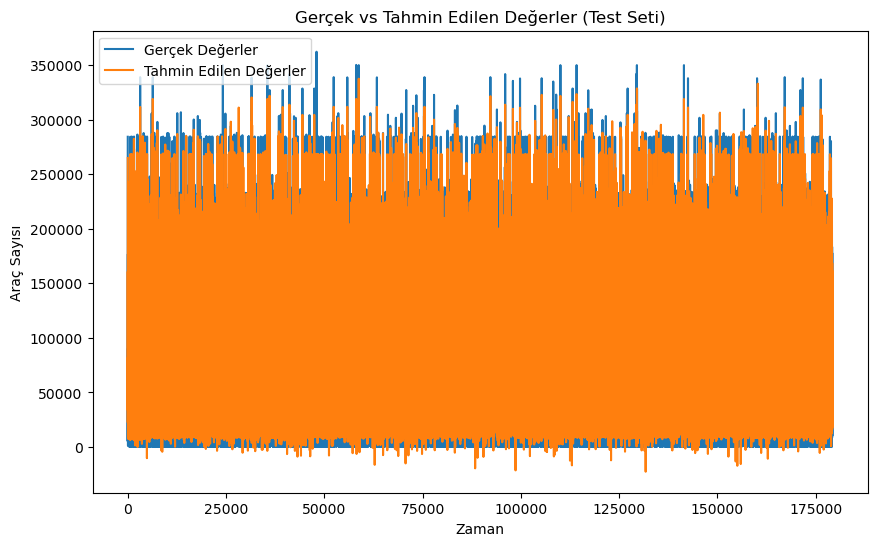

In [34]:
# Test seti üzerinde tahmin yapma
model.eval()
with torch.no_grad():
    X_test_seq = X_test.view(len(X_test), sequence_length, 1)  # (batch_size, sequence_length, input_size)
    y_pred_test = model(X_test_seq)

# Tahmin edilen değerleri ve gerçek değerleri ters ölçekleme (original değerlere geri dönelim)
y_pred_test_rescaled = scaler.inverse_transform(y_pred_test.numpy())
y_test_rescaled = scaler.inverse_transform(y_test.numpy())

# Performans değerlendirme (RMSE)
rmse_test = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_test_rescaled))
print(f"Test Seti RMSE: {rmse_test}")

# Gerçek ve Tahmin Edilen Değerleri Görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Gerçek Değerler")
plt.plot(y_pred_test_rescaled, label="Tahmin Edilen Değerler")
plt.title("Gerçek vs Tahmin Edilen Değerler (Test Seti)")
plt.xlabel("Zaman")
plt.ylabel("Araç Sayısı")
plt.legend()
plt.show()


Denenen Parametreler: {'dropout_rate': 0.1, 'hidden_layer_size': 50, 'learning_rate': 0.001}

Test Seti RMSE: 40813.49609375

Denenen Parametreler: {'dropout_rate': 0.1, 'hidden_layer_size': 50, 'learning_rate': 0.01}

Test Seti RMSE: 47020.38671875

Denenen Parametreler: {'dropout_rate': 0.1, 'hidden_layer_size': 100, 'learning_rate': 0.001}

Test Seti RMSE: 38443.9375

Denenen Parametreler: {'dropout_rate': 0.1, 'hidden_layer_size': 100, 'learning_rate': 0.01}

Test Seti RMSE: 47502.67578125

Denenen Parametreler: {'dropout_rate': 0.1, 'hidden_layer_size': 150, 'learning_rate': 0.001}

Test Seti RMSE: 37756.47265625

Denenen Parametreler: {'dropout_rate': 0.1, 'hidden_layer_size': 150, 'learning_rate': 0.01}

Test Seti RMSE: 45508.52734375

Denenen Parametreler: {'dropout_rate': 0.2, 'hidden_layer_size': 50, 'learning_rate': 0.001}

Test Seti RMSE: 41259.55078125

Denenen Parametreler: {'dropout_rate': 0.2, 'hidden_layer_size': 50, 'learning_rate': 0.01}

Test Seti RMSE: 55835.207031

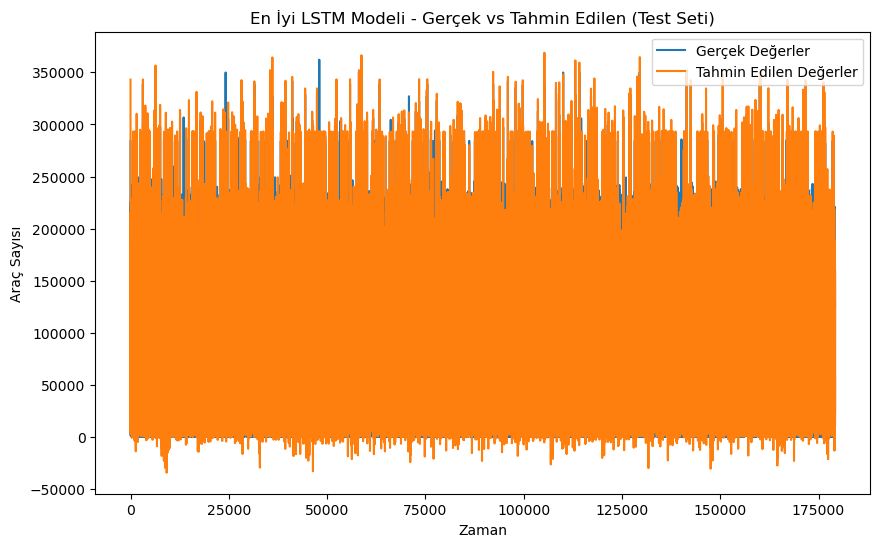

In [36]:
import torch.optim as optim
from sklearn.model_selection import ParameterGrid

# Model oluşturma fonksiyonu
def create_lstm_model(hidden_layer_size, dropout_rate):
    model = LSTMModel(input_size, hidden_layer_size, output_size, dropout_rate)
    return model

# Hyperparametre grid
param_grid = {
    'hidden_layer_size': [50, 100, 150],
    'dropout_rate': [0.1, 0.2, 0.3],
    'learning_rate': [0.001, 0.01]
}

# Hyperparametre tuning için grid search
best_rmse = float('inf')
best_params = None
best_model = None

for params in ParameterGrid(param_grid):
    print(f"Denenen Parametreler: {params}")
    
    # Modeli oluştur ve optimizer'ı ayarla
    model = create_lstm_model(params['hidden_layer_size'], params['dropout_rate'])
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])
    loss_function = nn.MSELoss()
    
    # Eğitim döngüsü
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            
            X_batch_seq = X_batch.view(X_batch.size(0), sequence_length, input_size)
            y_pred = model(X_batch_seq)
            loss = loss_function(y_pred, y_batch)
            
            loss.backward()
            optimizer.step()
    
    # Test seti üzerindeki performans
    model.eval()
    with torch.no_grad():
        X_test_seq = X_test.view(len(X_test), sequence_length, 1)
        y_pred_test = model(X_test_seq)
    
    # Ters ölçekleme (rescale)
    y_pred_test_rescaled = scaler.inverse_transform(y_pred_test.numpy())
    y_test_rescaled = scaler.inverse_transform(y_test.numpy())
    
    # RMSE hesaplama
    rmse_test = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_test_rescaled))
    print(f"Test Seti RMSE: {rmse_test}")
    
    # En iyi modeli bul
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_params = params
        best_model = model

print(f"En iyi parametreler: {best_params}")
print(f"En düşük RMSE: {best_rmse}")

# En iyi model ile tahminler ve görselleştirme
best_model.eval()
with torch.no_grad():
    X_test_seq = X_test.view(len(X_test), sequence_length, 1)
    y_pred_test = best_model(X_test_seq)

# Ters ölçekleme
y_pred_test_rescaled = scaler.inverse_transform(y_pred_test.numpy())
y_test_rescaled = scaler.inverse_transform(y_test.numpy())

# Tahminler ve gerçek değerleri karşılaştırma
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Gerçek Değerler")
plt.plot(y_pred_test_rescaled, label="Tahmin Edilen Değerler")
plt.title("En İyi LSTM Modeli - Gerçek vs Tahmin Edilen (Test Seti)")
plt.xlabel("Zaman")
plt.ylabel("Araç Sayısı")
plt.legend()
plt.show()


1. Yıl Tahmin Edilen Değerler: [155799.27758187  40941.6783502   72874.56579179 108335.88197157

 119246.16507411  48746.99332196 146725.35478055  36813.23754612

  92405.37763305 120206.34396762  84529.53398354  99714.20619339]

2. Yıl Tahmin Edilen Değerler: [ 90561.22316308  79827.30628282 117254.19212788 104355.59093155

  89266.62170954  73084.58800413  78037.62550041  60497.79630423

  74110.51861912  73421.63949311  73219.77479741  74853.36559542]

3. Yıl Tahmin Edilen Değerler: [76169.30483267 70777.68504418 76622.65614845 76901.88544959

 85346.35431819 82504.96659309 83554.55756858 78567.76433967

 87786.33522868 88698.11048195 94058.41110609 92490.71451895]


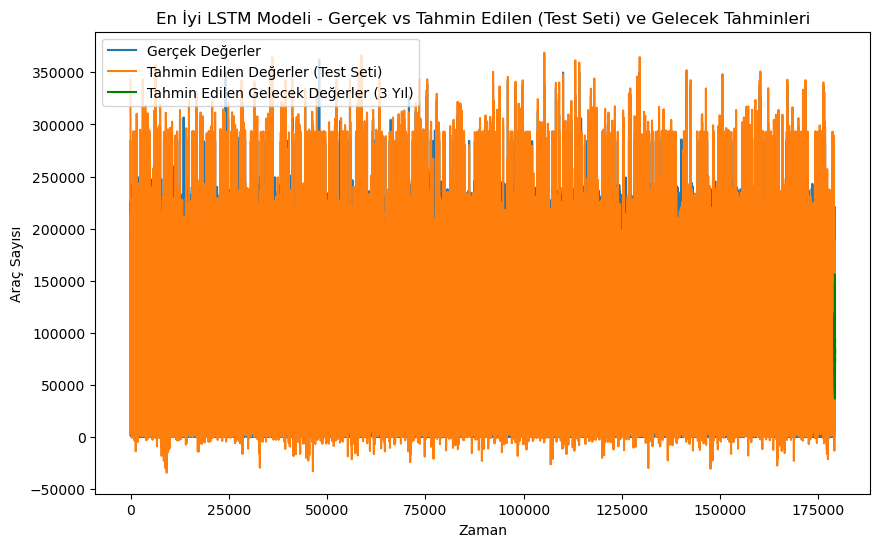

In [44]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Önümüzdeki 3 yıl (36 ay) için tahminleme
future_steps = 36

# Modeli kullanarak gelecekteki tahminler
best_model.eval()
predicted_future = []

# Mevcut test setindeki son sekans verisiyle başlayarak tahmin yap
last_sequence = X_test[-1].view(1, sequence_length, 1)

with torch.no_grad():
    for _ in range(future_steps):
        future_pred = best_model(last_sequence)
        predicted_future.append(future_pred.item())  # Sonuçları kaydet
        
        # Tahmin edilen değeri bir sonraki sekansa ekle
        future_value = torch.tensor([[future_pred.item()]], dtype=torch.float32)
        last_sequence = torch.cat((last_sequence[:, 1:, :], future_value.view(1, 1, 1)), dim=1)

# Ters ölçekleme (rescale) işlemi
predicted_future_rescaled = scaler.inverse_transform(np.array(predicted_future).reshape(-1, 1))

# Yıl bazında tahmin edilen değerleri ekrana yansıtma
predicted_future_yearly = np.split(predicted_future_rescaled, 3)

print("1. Yıl Tahmin Edilen Değerler:", predicted_future_yearly[0].flatten())
print("2. Yıl Tahmin Edilen Değerler:", predicted_future_yearly[1].flatten())
print("3. Yıl Tahmin Edilen Değerler:", predicted_future_yearly[2].flatten())

# Mevcut test seti tahminlerini grafiğe ekleyelim
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Gerçek Değerler")
plt.plot(y_pred_test_rescaled, label="Tahmin Edilen Değerler (Test Seti)")

# Tahmin edilen geleceği grafiğe ekleme (renk: yeşil)
future_time_steps = np.arange(len(y_test_rescaled), len(y_test_rescaled) + future_steps)
plt.plot(future_time_steps, predicted_future_rescaled, label="Tahmin Edilen Gelecek Değerler (3 Yıl)", color='green')

# Grafik detayları
plt.title("En İyi LSTM Modeli - Gerçek vs Tahmin Edilen (Test Seti) ve Gelecek Tahminleri")
plt.xlabel("Zaman")
plt.ylabel("Araç Sayısı")
plt.legend()
plt.show()
